In [1]:
import random

In [2]:
def insert_pos(dct,pos,obj): # insert object obj into a dictionary dct 
    count=0 #counting zeros to record their positions
    for j in dct:
        l=dct[j]
        lc=0
        for i in l:
            #print(j,i,count)
            if i==0:
                count=count+1
                if count==pos:
                    l[lc]=obj
                    dct[j]=l
            lc=lc+1
    return(dct)

def children(node,T):
    return(T[node])

def parent(node,T):
    for k in range(1,node):
        if node in T[k]:
            ans=k
    return(ans)    
    
def dom(T):
    n=len(T)
    B=set(range(1,n+1))
    R=set([])
    F=set([])
    D=set([])
    for k in range(n-1):
        v=n-k
        p=parent(v,T)
        if v in B:
            R.add(p)
            if p in B:
                B.remove(p)
            if p in F:
                F.remove(p)    
        elif v in R:  
            if p not in R:
                F.add(p)
                if p in B:
                    B.remove(p)
            D.add(v)
    if 1 not in F:
        D.add(1)
    return(D)

def RandomTree(n,d):
        L_i=[0]*d  #[0,0,0,...]
        T={1:L_i}
        for k in range(2,n+1):
            max_p=(k-1)*d-k+2 # number zeros available for k
            p=random.randint(1,max_p)
            T=insert_pos(T,p,k)
            T[k]=[0]*d  
        for e in T: #layout for SageMath
            T[e]=[i for i in T[e] if i != 0]
        return(T)

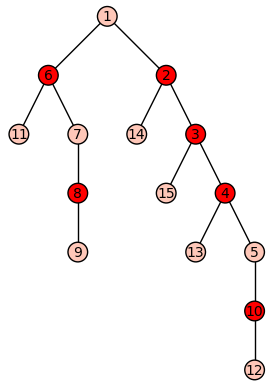

In [3]:
T=RandomTree(15,2)
D=list(dom(T))
col={'#FF0000':D}
t=Graph(T)
#t.graphplot(layout='tree',tree_root=1).show();
t.graphplot(layout='tree',tree_root=1,vertex_colors=col).show()

In [4]:
6./15

0.400000000000000

In [5]:
RandomTree(6,3)

{1: [2], 2: [3], 3: [4], 4: [5], 5: [6], 6: []}

# DE

In [6]:
from scipy.integrate import odeint # the function that we need to solve DE's
import numpy as np
import matplotlib.pyplot as plt
#import pandas as pd # deal with data in spreadsheet
from ipywidgets import *

/usr/lib/python3/dist-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


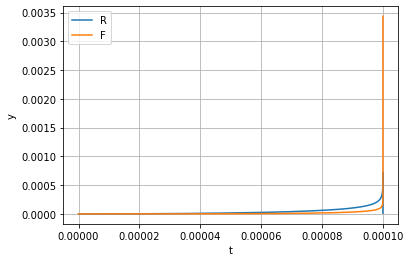

<ipython-input-7-c9300bec73ec>:31: RuntimeWarning: divide by zero encountered in power
  yy=-Integer(1)+(Integer(1)-(d-Integer(1))*t)**(-Integer(1)/(d-Integer(1)))


In [7]:
d=10000
n=100000
def Model(y,t): # defines your equation
    yy=-1+(1-(d-1)*t)**(-1/(d-1))
    yR=y[0] # extracting 1st function in y
    yF=y[1] # extracting 1st function in y
    DyF=(1+yR+yF)**d-(1+yF)**d
    DyR=(1+yy)**d-(1+yR+yF)**d
    return [DyR,DyF] # return a list of derivatives

t = np.linspace(0,1/(d-1),num=n) #creates a timeline 
#solve the DE
y0 = [0,0] # initial condition

y=odeint(Model, y0, t , args=()) # where the computer solves the DE

#extracting 1st column in y
yR=y[ : ,0 ]

#extracting 2nd column in y
yF=y[ : ,1 ]

plt.plot(t,yR,label='R')
plt.plot(t,yF,label='F')
#plt.plot(t,(1-(d-1)*t)**(-1/(d-1))-1-yB-yF,label='R')
plt.legend()
plt.xlabel('t') # show label on x axis
plt.ylabel('y') # show label on y axis
plt.grid() #add grid
plt.show()
yy=-1+(1-(d-1)*t)**(-1/(d-1))

In [8]:
#Calculating the constant for the mean, from the theoretical value
A=d*(1-(d-1)*t)**(1/(d-1))*yR/n
np.trapz(A)

0.37461779564338915

# Domination_recursive-with_Binary search trees

In [9]:
from ipywidgets import *
import numpy as np                   #to deal with array of numbers
from scipy.integrate import odeint   #to numerically solve DEs
import matplotlib.pyplot as plt 


def Domination(Y,t,a,b):
    F=Y[0]
    G=Y[1]
    return [-F*G/(1-t),G*(F-G-1)/(1-t)]
F0=1
G0=1
Y0=[F0,G0]
def cmu(n):
    t = np.linspace(0,1,num=n)
    Y=odeint(Domination,Y0,t,args=(0,1))
    #Y consists of 2 columns H and L
    #extract H from Y 
    F=Y[:,0]
    return np.trapz(1-F)/n   #((1-F).sum()/n) #all rows from the 1st column

# #G=Y[:,1] #all rows from the 1st column

# plt.plot(t,F,linewidth=2,label='F',color='green')
# plt.plot(t,G,linewidth=2,label='G',color='red')
# #plt.xlabel('x')
# #plt.ylabel('number (in thousands)')
# plt.legend()
# plt.grid()
# plt.show()

In [10]:
#constant for recursuve trees from a differential equation
for k in range(2,5):
    print(cmu(10**k))

0.3707741549744228
0.3741349450325613
0.3744717251806937


In [11]:
#Recursive Trees, from recursive formula
N=100000
A=np.array([1])
B=np.array([1])
for n in range(2,N+1):
    mrB=np.flipud(1-B)#reverse order in an array
    Dif=np.flipud(A-B)
    a=(A*mrB).sum()/(n-1)
    b=(B*Dif).sum()/(n-1)
    A=np.append(A,a)
    B=np.append(B,b)
C=np.array([1/(k+1)/k for k in range(1,N+1)])
print(1-(A*C).sum())
    

0.3745123252984298


In [12]:
#Binary Search Trees, from recursive formula
N=100000
P1=np.array([0]) #p1
P2=np.array([1]) #p2
for n in range(1,N):
    P0=1-P1-P2
    rP2=np.flipud(P2)#reverse order in an array
    rP0=np.flipud(P0)
    a=(P2*rP2).sum()/(n)
    b=(P2*rP0+P0*(rP0+rP2)).sum()/(n)
    P1=np.append(P1,a)
    P2=np.append(P2,b)
R=np.array([2/(k+1)/(k+2) for k in range(N)])
print(2-((P1+P2)*R).sum())

0.36275904455557306


In [13]:
#total domination recursive trees
N=10000
b=np.array([1]) #b
r=np.array([0]) #r
f=np.array([0]) #f
for n in range(2,N+1):
    #print(b,r,f,q)
    q=1-b-r-f
    rf=np.flipud(f)#reverse order in an array
    rb=np.flipud(b)
    rq=np.flipud(q)
    be=(b*rf).sum()/(n-1)
    re=(r*(rf+rb)+b*rb).sum()/(n-1)
    fe=(f*(rf+rb)+b*rq).sum()/(n-1)
    b=np.append(b,be)
    r=np.append(r,re)
    f=np.append(f,fe)
print((be,re,fe,1-re-be-fe))


(1.8934030783553263e-08, 3.439785713578465e-08, 0.00013759399090311058, 0.999862352677209)


# D-ary

In [14]:
import random
import matplotlib.pyplot as plt
import numpy as np 

In [15]:
def insert_pos(dct,pos,obj): # insert objec obj into a dictionary dct 
    count=0 #counting zeros to record their positions
    for j in dct:
        l=dct[j]
        lc=0
        for i in l:
            #print(j,i,count)
            if i==0:
                count=count+1
                if count==pos:
                    l[lc]=obj
                    dct[j]=l
            lc=lc+1
    return(dct)

def children(node,T):
    return(T[node])

def parent(node,T):
    for k in range(1,node):
        if node in T[k]:
            ans=k
    return(ans)    
    
def dom(T):
    n=len(T)
    B=set(range(1,n+1))
    R=set([])
    F=set([])
    D=set([])
    for k in range(n-1):
        v=n-k
        p=parent(v,T)
        if v in B:
            R.add(p)
            if p in B:
                B.remove(p)
            if p in F:
                F.remove(p)    
        elif v in R:  
            if p not in R:
                F.add(p)
                if p in B:
                    B.remove(p)
            D.add(v)
    if 1 not in F:
        D.add(1)
    return(D)

def RandomTree(n,d):
        L_i=[0]*d
        T={1:L_i}
        for k in range(2,n+1):
            max_p=(k-1)*d-k+2
            p=random.randint(1,max_p)
            T=insert_pos(T,p,k)
            T[k]=[0]*d  
        return(T)
            

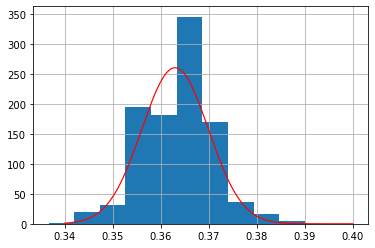

In [16]:
d=2
M=1000
n=300
C=[]
for r in range(M):
    T=RandomTree(n,d) 
    dd=len(dom(T))/n    
    C.append(dd)
    
plt.hist(C) 
t = np.linspace(0.34,0.4,num=200)
sg=.12/n**(.5)
y=260*np.exp(-.5*((t-.363)/sg)**2)
plt.hist(C,color='#1f77b4') 
plt.plot(t,y,linewidth=1.2,color='red')
plt.grid()
plt.show()

# Algebra_binary

In [17]:
var('x,u')

(x, u)

In [18]:
n=100
d=50
yB=0
yR=0
yF=0
for k in range(1,n):
    dyB=taylor((1+yF)^d,x,0,k)
    dyF=taylor((1+yR+yF)^d-(1+yF)^d,x,0,k)
    dyR=taylor((1+yB+yF+yR)^d-(1+yR+yF)^d,x,0,k)
    yBint=integrate(dyB,x)
    yRint=integrate(dyR,x)
    yFint=integrate(dyF,x)
    yB=taylor(yBint,x,0,k)
    yR=taylor(yRint,x,0,k)
    yF=taylor(yFint,x,0,k)
#check    
print(yB+yR+yF)  

1624805041223597048670134567893966432550321190782291829259003984300890358569204589270089203475727409650497640946318311258634563061332308457049955025993997899148181240836212447500/33232930569601*x^99 + 33490672305046035356723573229544592301162148217248988360741493742616728190370862864405336486382888518717315522316367440059300800139891429783040921834979344579569007462582767500/33232930569601*x^98 + 14089470889796396868625819616972903786774147335822039697409126521925422040543063889106157545806852553099417552510040992873075641623849991494758486257879404534946995146227500/678223072849*x^97 + 290473682531402868492392030360546581788967543374014420966776891100269062259867629594749687979439893230742508521460993901952887829439627879913193021682104620592956116723500/678223072849*x^96 + 5989148093430986979224577945578280036885928729361122081789214249490083757935415043190715216070925633623556876731154513442327584112157275874498825189321744754493940551000/678223072849*x^95 + 123500991724754452577889

In [19]:
g=taylor(1/(1-(d-1)*x)^(d/(d-1))*integrate((1-(d-1)*x)^(d/(d-1))*diff(yR,x),x),x,0,n-1);g

3083090357469471937913428959467657238832528287285358496865964515769038547524908995465362706733091310065227621483269507681695062543444440341973286693148995344471927723230508250544597221394171287038379640295706394993065401027265887888701063042148531622553047022080820338164050674997875/97227399700212445539752386099868673346770442975779611822932356031122729459829724321216729799086449678929822889229156352*x^99 + 1869223020654020337511563590398168564321110406088740202950169026541848425284666127390292249192782947595194648050078905598660668981808377403538831078997533229120290377653483917859481964649492590603523745346568044144705264275442356007177565591829312077497274325547695146828494012887133125/2889452477990763562773131286308947168855997409575706393959815222710920835451949662240079384534150654783275941533556683046912*x^98 + 24404422287330949415468918837972970812907573526674798123503397246709275451967047441075165200641642298042288945341022292877538451838614981947713332752244493335887770676623

In [20]:
#Getting the coeffients of yB
for k in range(2,n-1):
    print(RR(yB.coefficient(x,k)))

0.000000000000000
0.000000000000000
5208.33333333333
51041.6666666667
2.96041666666667e6
1.37942559523810e8
4.26072986111111e9
1.93110488377701e11
7.95075159143932e12
3.24273023080363e14
1.40763281699606e16
6.02459734110909e17
2.61353702217808e19
1.14826915780961e21
5.06212569707521e22
2.24913207537335e24
1.00505680552932e26
4.51200005976077e27
2.03527736474860e29
9.21771132630522e30
4.19001002729239e32
1.91109893542495e34
8.74341681087455e35
4.01149498042633e37
1.84528140986838e39
8.50867892652483e40
3.93214754059783e42
1.82094613643367e44
8.44894628158958e45
3.92727291429669e47
1.82857454011223e49
8.52750488485743e50
3.98270158883262e52
1.86269767979876e54
8.72331062945571e55
4.09037421542695e57
1.92025279665510e59
9.02486316188191e60
4.24604837864578e62
1.99971646323117e64
9.42691994559631e65
4.44804708791286e67
2.10062585936824e69
9.92866073286636e70
4.69655333018389e72
2.22330731767290e74
1.05326430262868e76
4.99320858759077e77
2.36872244131089e79
1.12442151159767e81
5.34089061751

In [21]:
yR

3083090357469471937913428959467657238832528287285358496865964515769038547524908995465362706733091310065227621483269507681695062543444440341973286693148995344471927723230508250544597221394171287038379640295706394993065401027265887888701063042148531622553047022080820338164050674997875/96235485808147433852956299728721267987182905300042215252610662947760938708352171532793788258593831339010114432901578752*x^99 + 10485114576856893218368721204445803352995091702147548361256727030665156027892110362660685747097925417320648545607653803939339122087842159968331683639905305733930406683204591562879077557589697291528807077264066387192462030000057007976891830965179897481081777671005363469857015600625/15877235032320620399982689180832801789131186396303261102282567287677730628650694966689884258151844227648133357616758784*x^98 + 116918160765608231233505611627941722621304159222435378989146504604023107972625403752468583483215400094787021314364762681235590637741440208155488846761207016967756401976681486650588

In [22]:
yB

257608537331783343246172606209094428322743539230954640284796992730484742838630095388993972039902291805347641185751319528358967897499283009170015941715455754757864154030511299951067145782195929688432995213219917785758808881314856829228671821533291611541971797714444159371569671875/490997376572180784964062753717965652995831149490011302309238076264086421981388630269356062543846078260255685882150912*x^99 + 195775021425061194008850993466018875082566876002788488782992030964471455531469313728647252384704819555500565579354400857135736710832197977824480584888617200872885235016367793078157653449306006003268722520563390144375955776692632503676613523050719779070826961994352853953125/17990406126324865416692847773110085547642864957019759016069054498076267030296332475607179125400514002948462739456*x^98 + 46121114060043851542173987995628381753657633759224263402248436726106348851739962983739180348804630322008873840500888044585762510783762871259125403967150857076713129236548815405378557937529188295452958

In [24]:
#counting number of trees of order N in each class
N=50
b=factorial(N)*(yB.coefficient(x,N))
f=factorial(N)*(yF.coefficient(x,N))
r=factorial(N)*(yR.coefficient(x,N))
print(b,f,r)

720425450990193656086818206688794706045631967979903105658376420227365098385384118334427692001837941025503941127727492104361738240000000000000000 14357751748563829925531096501701439257613139871386014783659370013014671492197348464754572974733650380395872056838695467566441719398400000000000000 28903034259860342473543699962824961941572131095733316053900388957751498671377868360000332592543180150593168349196172380792101653184512000000000000


In [25]:
#The constant in the average
var('j')
M=100
y=yB+yR+yF
for k in range(2,M):
    t_k=product(1+j*(d-1),j,1,k-1)
    coef_g=RR(g.coefficient(x,k))
    coef_y=RR(y.coefficient(x,k))
    print(coef_g/coef_y/k)
    
    

0.127727221709300
-0.0376860012594177
0.00501688766572361
0.00568750469913371
0.00153232945009354
0.00485809409287968
0.00458401577806923
0.00478695604086981
0.00519472390059103
0.00529311852349013
0.00545289360298435
0.00558052319949648
0.00567251368512620
0.00575920532882298
0.00583069594462561
0.00589190832408092
0.00594591188796906
0.00599287878236870
0.00603440655532546
0.00607134772659191
0.00610432148686138
0.00613395848198675
0.00616071064606944
0.00618496209562090
0.00620703997910197
0.00622721169711272
0.00624570564353458
0.00626271583712522
0.00627840757258785
0.00629292326301865
0.00630638584363564
0.00631890200288228
0.00633056479853324
0.00634145569595294
0.00635164631176543
0.00636119984040821
0.00637017223772392
0.00637861321799517
0.00638656708933662
0.00639407345990245
0.00640116783757518
0.00640788214057655
0.00641424513439546
0.00642028280696678
0.00642601869194710
0.00643147414826868
0.00643666860265428
0.00644161976066054
0.00644634379088717
0.00645085548622248
0.